# Лабораторная работа № 3. Метод Монте-Карло

## Условие

![task](./task.jpg "Task")

## Реализация

In [59]:
# Библиотеки

import matplotlib.pyplot as plt
from random import uniform
import numpy as np

### Задание 1

In [60]:
# Задаём невыпуклый 13-угольник

shape = [(4, 3), (4, 4), (2, 6), (5, 9), (7, 7), (9, 10), (8, 6), (10, 4), (9, 1), (8, 2), (6, 1), (6, 3), (5, 2)]

In [61]:
# Определим прямоугольник, который её ограничивает

x_min = min(shape, key=lambda x: x[0])[0]
x_max = max(shape, key=lambda x: x[0])[0]

y_min = min(shape, key=lambda y: y[1])[1]
y_max = max(shape, key=lambda y: y[1])[1]

In [62]:
# Случайная генерация точек

def generate_points(x_min, x_max, y_min, y_max, N):
    points = []
    
    for i in range(N):
        x = uniform(x_min, x_max)
        y = uniform(y_min, y_max)
        points.append((x, y))

    return points

In [63]:
N = 30

random_points = generate_points(x_min, x_max, y_min, y_max, N)

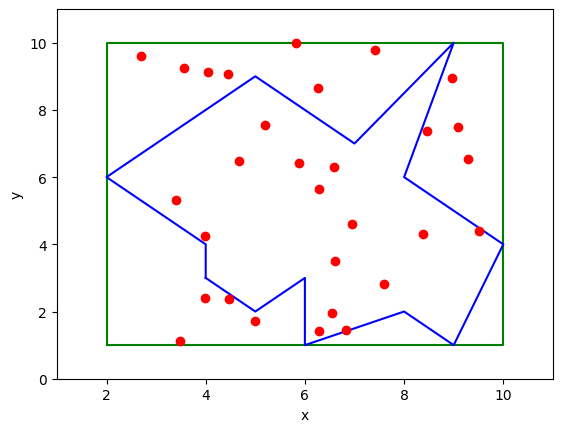

In [64]:
# Отрисовка получившихся данных

plt.xlabel("x")
plt.ylabel("y")

plt.xlim(x_min-1, x_max+1)
plt.ylim(y_min-1, y_max+1)

# Прямоугольник

plt.plot([x_min, x_min, x_max, x_max, x_min], [y_min, y_max, y_max, y_min, y_min], "-", color="g")

# Фигура

shape.append(shape[0])  # чтобы фигуру замкнуть

shape_x = [x[0] for x in shape]
shape_y = [y[1] for y in shape]

plt.plot(shape_x, shape_y, color="b")

# Точки

for point in random_points:
    plt.plot(point[0], point[1], "o", color="r")

plt.show()

Теперь нужно посчитать, сколько точек попало в фигуру

Для этого из каждой точки проведём луч в одном направлении (допустим, в сторону увеличения x) и посчитаем, сколько раз он пересёк грани фигуры

Если число пересечений нечётно, то точка в фигуре, иначе же - вне её

In [65]:
def points_in_shape(random_points, shape):
    count_points = 0
    
    for x_point, y_point in random_points:
        overlaps = 0

        for i in range(len(shape)-1):
            x0, x1 = shape[i][0], shape[i+1][0]
            y0, y1 = shape[i][1], shape[i+1][1]

            if y1 != y0:
                x = x0 + (x1 - x0) / (y1 - y0) * (y_point - y0)  # координата x, где прямые пересекаются
                y = y_point  # координата y, где прямые пересекаются

                # Таким образом нашли пересечение прямой, проходящей через точку, и прямой, проходящей через сторону фигуры
                # Теперь нужно проверить, что эта точка будет лежать на луче и на самой грани фигуры

                if x >= x_point and x >= min(x1, x0) and x <= max(x1, x0) and y >= min(y1, y0) and y <= max(y1, y0):
                    overlaps += 1

            else:
                if y_point == y0 and x_point <= max(x1, x0):
                    overlaps += 1

        if overlaps % 2 != 0:
            count_points += 1

    return count_points

In [66]:
K = points_in_shape(random_points, shape)
K

15

Посчитаем площадь прямоугольника, ограничивающую фигуру

In [67]:
area_rect = (x_max - x_min) * (y_max - y_min)
area_rect

72

Теперь нужно поделить количество точек, попавших в фигуру на количество вообще всех точек, а затем умножить на площадь прямоугольника

Тем самым получим приближённую площадь фигуры

In [68]:
estimated_area = area_rect * K / N
estimated_area

36.0

Построим график зависимости приблизительной площади фигуры от количества точек

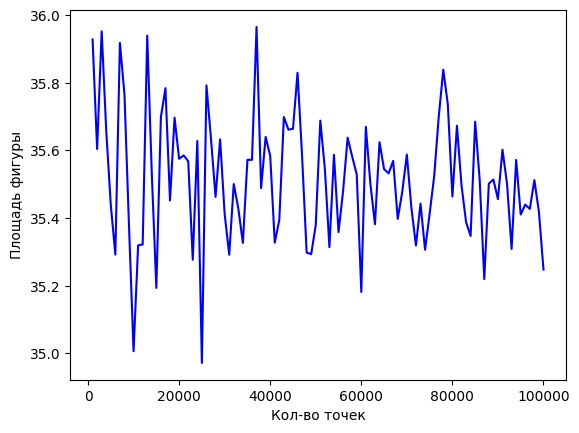

In [69]:
plt.xlabel("Кол-во точек")
plt.ylabel("Площадь фигуры")

X, Y = [], []

for n in range(1000, 101000, 1000):
    X.append(n)
    Y.append(area_rect * points_in_shape(generate_points(x_min, x_max, y_min, y_max, n), shape) / n)
    
plt.plot(X, Y, "-", color="b")
plt.show()

### Задание 2

Теперь по этой же области посчитаем интеграл от z = x^2*y^2. Для этого сгенерируем точки в области, посчитаем значение z для каждой точки, потом найдём среднее значение z для точек sum(z)/N и умножим на площадь квадрата

In [70]:
def z(x, y):
    return x**2*y**2

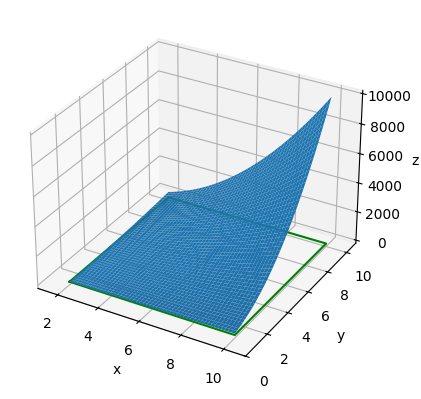

In [71]:
# Фигура

ax = plt.figure().add_subplot(projection="3d")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim(x_min-1, x_max+1)
ax.set_ylim(y_min-1, y_max+1)

x, y = np.meshgrid(np.linspace(x_min, x_max, endpoint=True), np.linspace(y_min, y_max, endpoint=True))

ax.plot_surface(x, y, z(x, y))
ax.plot([x_min, x_min, x_max, x_max, x_min], [y_min, y_max, y_max, y_min, y_min], "-", color="g")

In [72]:
N = 100

random_points = generate_points(x_min, x_max, y_min, y_max, N)

In [73]:
def avg_z(points, z):
    total_z = 0
    
    for point in points:
        total_z += z(point[0], point[1])

    return total_z / len(points)

In [74]:
average = avg_z(random_points, z)
average

1747.4806238496403

In [75]:
integral = average * area_rect
integral

125818.6049171741

Построим график зависимости интеграла от количества точек. Можно также отдельно посчитать определённый интеграл и вывести его значение для сравнения

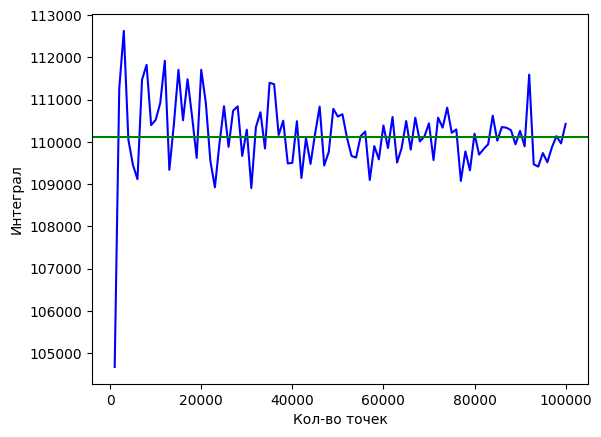

In [76]:
plt.xlabel("Кол-во точек")
plt.ylabel("Интеграл")

X, Y = [], []

for n in range(1000, 101000, 1000):
    X.append(n)
    Y.append(area_rect * avg_z(generate_points(x_min, x_max, y_min, y_max, n), z))
    
plt.plot(X, Y, "-", color="b")

I = (x_max**3 - x_min**3)*(y_max**3 - y_min**3)/9 # истинное значение определённого интеграла
plt.axhline(I, color="g")  

plt.show()

### Другой способ (возможно, неправильный)

Здесь генерируем 3-х мерные точки и проверяем, находятся ли они в фигуре, а потом по аналогии с 2-х мерным случаем

In [77]:
z_min = y_min**2*x_min**2
z_max = y_max**2*x_max**2

In [78]:
def generate_points_3d(x_min, x_max, y_min, y_max, z_min, z_max, N):
    points = []
    
    for i in range(N):
        x = uniform(x_min, x_max)
        y = uniform(y_min, y_max)
        z = uniform(z_min, z_max)
        points.append((x, y, z))

    return points

In [79]:
N = 300

random_points = generate_points_3d(x_min, x_max, y_min, y_max, z_min, z_max, N)

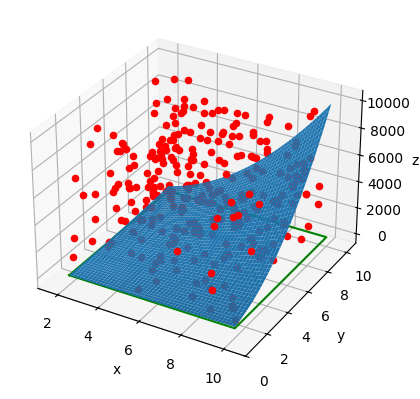

In [80]:
# Фигура

ax = plt.figure().add_subplot(projection="3d")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim(x_min-1, x_max+1)
ax.set_ylim(y_min-1, y_max+1)

x, y = np.meshgrid(np.linspace(x_min, x_max, endpoint=True), np.linspace(y_min, y_max, endpoint=True))

ax.plot_surface(x, y, z(x, y))
ax.plot([x_min, x_min, x_max, x_max, x_min], [y_min, y_max, y_max, y_min, y_min], "-", color="g")

# Точки

for point in random_points:
    ax.scatter(point[0], point[1], point[2], color="r")

plt.show()

In [81]:
def points_in_shape_3d(random_points, z):
    count_points = 0
    
    for x0, y0, z0 in random_points:
        if z0 <= z(x0, y0):
            count_points += 1

    return count_points

In [82]:
K = points_in_shape_3d(random_points, z)
K

45

In [83]:
volume_rect = area_rect * (z_max - z_min)
volume_rect

719712

In [84]:
estimated_volume = volume_rect * K / N
estimated_volume

107956.8

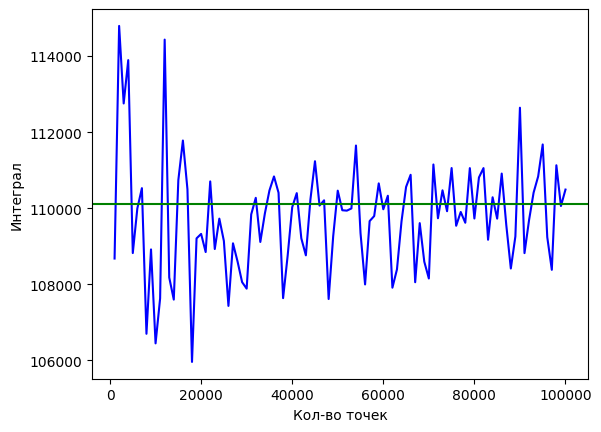

In [85]:
plt.xlabel("Кол-во точек")
plt.ylabel("Интеграл")

X, Y = [], []

for n in range(1000, 101000, 1000):
    X.append(n)
    Y.append(volume_rect * points_in_shape_3d(generate_points_3d(x_min, x_max, y_min, y_max, z_min, z_max, n), z) / n)
    
plt.plot(X, Y, "-", color="b")

I = (x_max**3 - x_min**3)*(y_max**3 - y_min**3)/9 # истинное значение определённого интеграла
plt.axhline(I, color="g")  

plt.show()